In [1]:
import alpaca_trade_api as alpaca
from dotenv import load_dotenv
import os
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import datetime as dt
import statistics
from sklearn.linear_model import LinearRegression
import requests

In [2]:
# initialize API from API keys in .env
load_dotenv()
api_key = os.environ['APCA-API-KEY-ID']
api_secret_key = os.environ['APCA-API-SECRET-KEY']
api_base_url = 'https://paper-api.alpaca.markets/v2'
api = alpaca.REST(api_key, api_secret_key, api_base_url)

In [3]:
def regression(ticker, start_date='2020-01-01'):
    bars = api.get_bars(ticker, alpaca.TimeFrame.Day, start_date, adjustment='split').df
    SPY_bars = api.get_bars("SPY", alpaca.TimeFrame.Day, start_date, adjustment='split').df
    bars['change'] = bars['close'].diff()
    SPY_bars['change'] = SPY_bars['close'].diff()
    bars['percent change'] = bars['change'] / bars['close'] * 100
    SPY_bars['percent change'] = SPY_bars['change'] / SPY_bars['close'] * 100
    bars = bars.dropna()
    SPY_bars = SPY_bars.dropna()

    # Assuming df1 and df2 are your dataframes and 'col1' and 'col2' are the columns
    x = SPY_bars['percent change'].values.reshape(-1, 1)  # Independent variable (reshape for 2D array)
    y = bars['percent change'].values  # Dependent variable

    # Initialize the linear regression model
    model = LinearRegression()

    # Fit the model
    model.fit(x, y)

    # Get the slope (coefficient) and intercept of the regression line
    slope = model.coef_[0]
    intercept = model.intercept_

    plt.scatter(SPY_bars['percent change'], bars['percent change'])

    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")

    # Optionally, you can get the R^2 value to evaluate the model
    r_squared = model.score(x, y)
    print(f"R-squared: {r_squared}")

def get_position_sizing(ticker, start_date='2024-01-01', SPY_equivalent=7000):
    bars = api.get_bars(ticker, alpaca.TimeFrame.Day, start_date, adjustment='split').df
    #display(bars)
    SPY_bars = api.get_bars("SPY", alpaca.TimeFrame.Day, start_date, adjustment='split').df
    bars['change'] = bars['close'].diff()
    SPY_bars['change'] = SPY_bars['close'].diff()
    bars['percent change'] = bars['change'] / bars['close'] * 100
    SPY_bars['percent change'] = SPY_bars['change'] / SPY_bars['close'] * 100
    bars = bars.dropna()
    SPY_bars = SPY_bars.dropna()
    display(bars['percent change'].describe())
    # print((bars['percent change'].abs().median()))
    display(SPY_bars['percent change'].describe())
    # print((SPY_bars['percent change'].abs().median()))
    v1 = bars['percent change'].describe()['std']
    v2 = SPY_bars['percent change'].describe()['std']
    # v1 = (bars['percent change'].abs().median())
    # v2 = (SPY_bars['percent change'].abs().median())
    std_ratio = v1 / v2
    std_ratio
    return SPY_equivalent / std_ratio

def both(ticker, start_date='2024-01-01', SPY_equivalent=7000):
    regression(ticker, start_date)
    return get_position_sizing(ticker, start_date, SPY_equivalent)

Slope: 1.6586878307455397
Intercept: 0.024773183050541547
R-squared: 0.3963671275312384


count    280.000000
mean       0.166787
std        2.090617
min      -10.246732
25%       -0.995075
50%        0.103703
75%        1.436357
max       10.059660
Name: percent change, dtype: float64

count    280.000000
mean       0.085618
std        0.793522
min       -3.071911
25%       -0.303564
50%        0.110941
75%        0.573664
max        2.426232
Name: percent change, dtype: float64

'$2656.9427479903743'

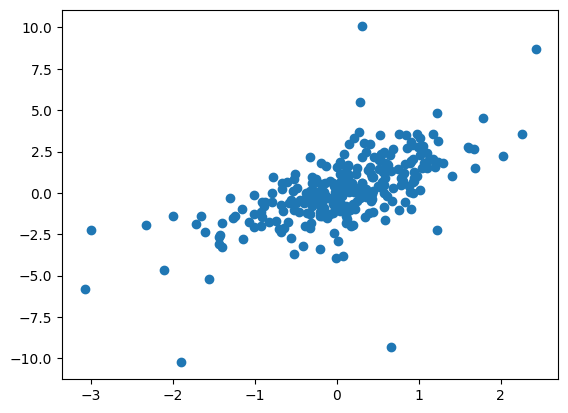

In [4]:
f"${both('KKR', start_date='2024-01-01')}"